# The Algebra and Geometry of the Axioms of Unsupervised Evaluation

## Introduction

This notebook explains the algebra and geometry of the axioms of unsupervised evaluation for N test-takers that answer Q questions that have R choices. This is done using the terminology of Algebraic Geometry. Every subset of the N test-takers of size M is associated with a polynomial ideal represented by a set of R equations, one for each response label. This is the algebraic side of the logic of unsupervised evaluation. These ideals define a set of evaluation points - called **varieties** - that are logically consistent with how the M-sized subset responded to the test. These evaluation points exist in simplexes of the possible integer values for response tuples by true label. This is the geometric side of the logic of unsupervised evaluation.

Starting in version 0.5, ntqr, now supports constructing the $M=1$ axiom ideals for any number of labels, $R.$ Consequently, logical alarms for tests with any number of $R$ responses are now supported.

In [1]:
import sympy
from IPython.display import Math
import ntqr
import ntqr.raxioms
sympy.init_session()

IPython console for SymPy 1.12 (Python 3.11.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



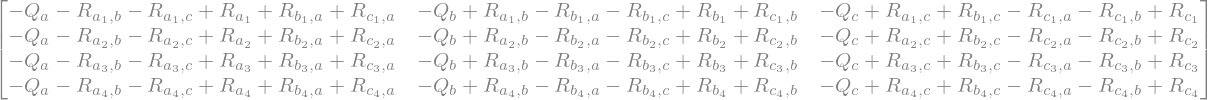

In [20]:
N=4
labels = ('a','b','c',)
m1axioms = ntqr.raxioms.MAxiomIdeals(labels,range(1,N+1))
Matrix(
   [
       [ m1axioms.m_complex[(classifier,)]['axioms'][label]
            for label in labels]
    for classifier in range(1,N+1)]
)